# A Case Study in Text Classification


# 1. Introduction

## Problem Domain: Automated Hate Speech Recognition in Social Networks

Through social media, individuals have had a platform where they can express themselves and earn respect to their opinions. Although this has empowered numerous users, it has also brought in great challenges.

Another key issue is the increased number of abusive and hateful content, which could be posted under the pretext of anonymity. The absence of responsibility contributes to the fact that people can share some inappropriate or abusive content without any serious punishment.

As it is noted in the [research](https://doi.org/10.1016/j.copsyc.2021.12.010), online hate has become an urgent question of social media. In 2020 and the first months of 2021, despite the crackdown on hate speech and harassment initiated by major tech companies, the appearance of such material did not change significantly, according to the reports about it by users. The outcome of the surveys held in several countries shows that 42 percent to 67 percent of young adults have seen degrading or hateful posts on the internet, 21 percent of the respondents being direct victims.

Reacting to this, social media firms are introducing a hate speech detection feature that will automatically detect such dangerous content and delete it, thus enhancing safety and user experience.

There is however complexity in detecting the hate speech because it involves understanding the language seen to be hateful and the hateful one. To address that, we use Natural Language Processing (NLP) tools, namely, text classification techniques. Our project would adopt the same where we test and compare the output of two different classifiers to detect hate speech.


## Objectives


We shall construct and set up two performance of classifiers. Through this, it is possible to know which model is more accurate and suitable to be used in detecting content of hate speech.

### Statistical

Naive Bayes will help us create a model of text classification. The benefit of employing Naive Bayes is that it is fast [GeeksForGeeks](https://www.geeksforgeeks.org/how-to-generate-word-embedding-using-bert). It is quick and with high-dimensional data prediction is also simple'. Embedding-based models are usually much more complex to execute and understand than statistical ones.

### Embedding-based

In our second classifier we will employ a recurrent neural network (RNN), the most effective model when dealing with sequential data, such as text. RNNs is very good at discovering dependencies over sequences but require more computational resources and in many cases need more data to train effectively.


## Dataset description

The data identified by me will be known as Ethos. It is an acronym to multi-labEl haTe speecH detectiOn dataSet. The authors are Grigorios Tsoumakas, Ioannis Mollas, Zoe Chrysopoulou and Stamatis Karlos. They published a related paper in pre-print  [here](https://doi.org/10.1007/s40747-021-00608-2).

It can have two variations multi-label and binary. But it will require the binary form of it in this case.


The size of the file is 124 KB. It entails 998 comments, and a label showing the absence or presence of hate speech. Among them, 565 are neutral of hate speech and the other 433 include hate speech.

Column one holds strings ( comments ) and the second holds integers/booleans ( 0 or 1 )

The remarks were downloaded YouTube and Reddit and heard with the assistance of the [Figure-Eight](https://aws.amazon.com/financial-services/partner-solutions/figure-eight/) crowdsourcing platform.

## Evaluation Methodology

To properly compare the results of both Naive Bayes and RNN classifiers, we need to use appropriate evaluation metrics based on the methodologies and datasets being used.

### Precision

Precision measures the proportion of predicted positives out of the actual positives. Its formula is:

$Precision = {True Positive(TP) \over True Positive(TP) + False Positive(FP)}$

Precision is great for this case because it indicates how many of the comments considered toxic were actually classified correctly.

### Recall

Recall measures the proportion of correctly identified true positive predictions.
Its formula is:

$Recall = {True Positive(TP) \over True Positive(TP) + False Negative(FN)}$

In this context, recall quantifies the proportion of actual instances of hate speech that the model correctly identifies.

### F1 Score

The F1 score balances precision and recall. By using it, we get a single value that accounts for both false positives and false negatives.

Its formula is:

$F1 = 2 * {Precision(P) * Recall(R) \over Precision(P) + Recall(R)}$

It provides a balance between how precise and how complete the results of both classifiers are.

### Confusion matrix

To compare the results, we'll also **use** the Confusion Matrix. It provides a breakdown of true positives, true negatives, false positives, and false negatives. It's great for seeing categorical values rather than normalized.

# 2. Implementation

## Data preprocessing

The preprocessing of the models will follow with a lot of parallels. In both cases, I am going to eliminate a stop word which is not relevant to defining the toxiness of a comment. I will also pre-process the text by stripping non-alphanumerics, downcasing the text as well as lemmatization of the text. These actions make the information less detailed and get a stable and significant picture of words, that may advance the exhibition of the model.

The main alternative between the two models is that of transformation of the text data into numerical data. In the case of the Naive Bayes model, I will utilize the CountVectorizer that involves the Bag-of-Words strategy. This is done because it forms a matrix according to word frequency thus appropriate in probabilistic models such as the Naive Bayes. On the contrary, in the case with RNN, I will use the Tokenizer of Keras. With the same original words structure, this tool represents text as a series of integers rather than some other data, which is vital to RNNs because they base their pattern-searching process on having knowledge about the sequence and context of the text.



In [ ]:
!pip uninstall nltk -y
!pip install nltk --upgrade

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re

import tensorflow_hub as hub
import tensorflow_text
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_data = pd.read_csv("/content/drive/MyDrive/NLP/Ethos_Dataset_Binary.csv", sep=";")

NLP_data = df_data.to_numpy()

# Extract the features
comments = NLP_data[:, 0]

labels = NLP_data[:, 1]

# Dichotomize the labels (hate speech: 0 = no, 1 = yes)
labels[labels >= 0.5] = 1
labels[labels < 0.5] = 0
labels = labels.astype(int)

# Splits the data into train and test sets
comments_train, comments_test, labels_train, labels_test = train_test_split(
    comments, labels, test_size=0.3, random_state=42)


In [ ]:
from nltk.tokenize import word_tokenize

try:
    print(word_tokenize("Test sentence."))
except LookupError as e:
    print(e)


**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

__stop_words = set(stopwords.words('english'))
__lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    tokens = [word for word in text.split() if word not in __stop_words]
    lemmatized_tokens = [__lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to comments
processed_comments_train = [preprocess_text(comment) for comment in comments_train]
processed_comments_test = [preprocess_text(comment) for comment in comments_test]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Naive Bayes

In [ ]:
# Convert processed comments into numerical features using CountVectorizer
CountVectorizer = CountVectorizer()
com_train_vect = CountVectorizer.fit_transform(processed_comments_train)
com_test_vect = CountVectorizer.transform(processed_comments_test)

### SimpleRNN

In [ ]:

num_words = 5000  # maximum number of unique words in the dictionary of the tokenizer
__tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words = num_words,
    char_level=False, oov_token=None)


__tokenizer.fit_on_texts(processed_comments_train)


__sequences_train = __tokenizer.texts_to_sequences(processed_comments_train)
__sequences_test = __tokenizer.texts_to_sequences(processed_comments_test)


max_length = 15
padded_sequences_train = tf.keras.preprocessing.sequence.pad_sequences(
    __sequences_train,
    maxlen=max_length,
    truncating="post",
    padding="post"
)
padded_sequences_test = tf.keras.preprocessing.sequence.pad_sequences(
    __sequences_test,
    maxlen=max_length,
    truncating="post",
    padding="post"
)
word_vector_dim = 100  # or any other dimension you prefer

embedding_layer = tf.keras.layers.Embedding(num_words+1,
                                     word_vector_dim,
                                     input_length=max_length,
                                     mask_zero=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


The padded sequences would make sure that they all have the same length because the neural networks demand that its inputs are in a regular form.

Model configuration will use the embedding layer further. The Recurrent Neural Network models among many others necessitate the word embeddings to reflect the semantic relationship that exists between words.

## Baseline Performance

The model that will be selected as the baseline model is the Logistic Regression model because of easiness in implementation and training, and effective when the outcomes have linearly separable differences.

The model I am going to compare to a logistic regression model is the model in the  [ETHOS: a multi-label hate speech detection dataset](https://link.springer.com/article/10.1007/s40747-021-00608-2) research paper, which also uses the same dataset (the research paper is written by the same team).

The metrics are shown below:

| F1 Score | Precision | Sensivity | Recall |
| -------- | --------- | --------- | ------ |
| 66.5     | 66.94     | 68.78     | 67.07  |


## Comparative Classification Approach

### Building the models

We're finally ready to build and train our models.



#### Naive Bayes
The naive Bayes model is straightforward and quick to create and train.

In [ ]:
nb_model = MultinomialNB()

# train data
nb_model.fit(com_train_vect, labels_train)

MultinomialNB()

#### SimpleRNN

This is followed by configuration of our RNN model. We can start with already created embedding layer. The network is enhanced by incorporating two SimpleRNN layers to allow the net to learn complex patterns to facilitate better accuracy.

The initial dense layer helps to extract upper level features of RNN layer output, using the activation function commonly used at hidden layers, which is ReLU, to obtain complex features.

The second thick layer has the advantage of using the sigmoid whose main application is in the binary classification exercise just like our case.

Using both those functions we increase robustness of our model.

The mechanism of early stopping is used and training is stopped after 20 epochs once no improvement has been seen, to optimise the training.

Last, the model is built with Adam optimizer, dynamically adaptable learning rate scaling and the ability to use momentum to enhance performance.

In [ ]:

# Specify the number of dimensions of the word vectors in the embedding layer
word_vector_dim = 50

__dropout_rate = 0.5

# Initalized as sequential model because layers are added sequentially
rnn_model = tf.keras.models.Sequential()

rnn_model.add(embedding_layer)

rnn_model.add(tf.keras.layers.SimpleRNN(128,
                                     return_sequences=True,
                                     dropout = __dropout_rate,
                                     recurrent_dropout=__dropout_rate))

rnn_model.add(tf.keras.layers.SimpleRNN(128,
                                     dropout=__dropout_rate,
                                     recurrent_dropout=__dropout_rate))

rnn_model.add(tf.keras.layers.Dense(64, activation="relu"))
rnn_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


__early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    patience=20,
    restore_best_weights=True
)


__optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
rnn_model.compile(optimizer=__optimizer,
               loss="binary_crossentropy",
               metrics=["accuracy"])


rnn_model_history = rnn_model.fit(padded_sequences_train, labels_train,
                            epochs=100, batch_size=8,
                            validation_data=(padded_sequences_test, labels_test),
                            callbacks=[__early_stopping])


rnn_model.save("/content/drive/MyDrive/NLP/rnn_model.keras")


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.5689 - loss: 0.6939 - val_accuracy: 0.5500 - val_loss: 0.6953
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5375 - loss: 0.7236 - val_accuracy: 0.5433 - val_loss: 0.6966
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5794 - loss: 0.6944 - val_accuracy: 0.5500 - val_loss: 0.7294
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5519 - loss: 0.6931 - val_accuracy: 0.5433 - val_loss: 0.7241
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5879 - loss: 0.7033 - val_accuracy: 0.5000 - val_loss: 0.7373
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5944 - loss: 0.6815 - val_accuracy: 0.5100 - val_loss: 0.7135
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6314 - loss: 0.6407 - val_accuracy: 0.5133 - val_loss: 0.7703
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6859 - loss: 0.6002 - val_accuracy: 0

# 3. Conclusion

## Performance Analysis & Comparative Discussion

In [ ]:
labels_pred_nb_model = nb_model.predict(com_test_vect)

labels_pred_prob_rnn_model = rnn_model.predict(padded_sequences_test)
labels_pred_rnn_model = labels_pred_prob_rnn_model.copy()
labels_pred_rnn_model[labels_pred_rnn_model >= 0.5] = 1
labels_pred_rnn_model[labels_pred_rnn_model < 0.5] = 0

print("Classification Report: Naive Bayes Model")
print(classification_report(labels_test, labels_pred_nb_model))

print("Classification Report: RNN Model")
print(classification_report(labels_test, labels_pred_rnn_model))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Classification Report: Naive Bayes Model
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       165
           1       0.66      0.68      0.67       135

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300

Classification Report: RNN Model
              precision    recall  f1-score   support

           0       0.55      0.99      0.71       165
           1       0.50      0.01      0.01       135

    accuracy                           0.55       300
   macro avg       0.53      0.50      0.36       300
weighted avg       0.53      0.55      0.40       300



Based on the classification report, it is evident in the Naive Bayes model that it is more accurate and precise compared to the RNN and it is able to recognize the hate comments with an accuracy of 70 percent.

The RNN turns out to produce a worse accuracy (59 %). Despite the fact that it does a better recall of non-hate speech comments.

Confusion Matrix: Naive Bayes Model


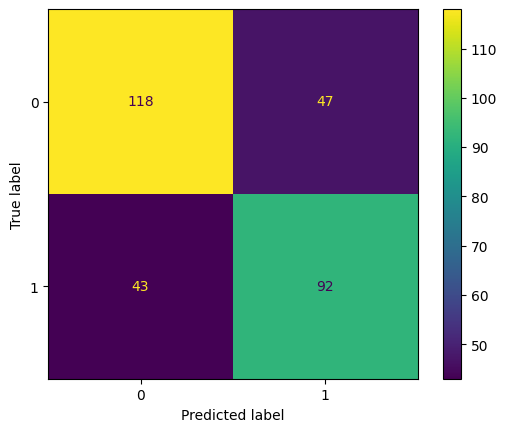

In [ ]:
print("Confusion Matrix: Naive Bayes Model")
nb_cm = confusion_matrix(labels_test, labels_pred_nb_model)
nb_cm_disp = ConfusionMatrixDisplay(nb_cm)
nb_cm_disp.plot()

Confusion Matrix: RNN Model


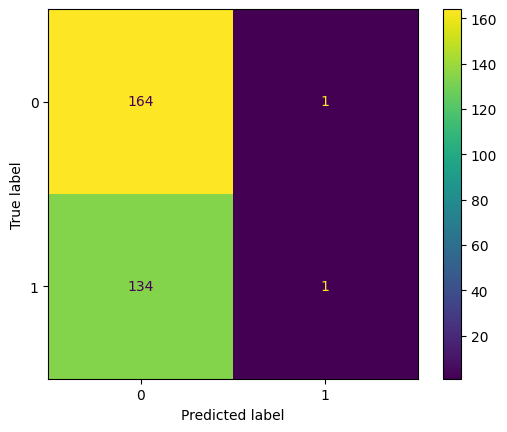

In [ ]:
print("Confusion Matrix: RNN Model")
rnn_cm = confusion_matrix(labels_test, labels_pred_rnn_model)
rnn_cm_disp = ConfusionMatrixDisplay(rnn_cm)
rnn_cm_disp.plot()

Based on the tables, it is possible to see that the Naive Bayes model is performing well in identifying non hate speech comments but it has a problem on the false positive. Conversely, the RNN model is very good in detecting normal comments, but not as good at detecting false negatives.

In [ ]:
import pandas as pd

metrics_table = pd.DataFrame({
    "Model": ["Naive Bayes", "RNN"],
    "Accuracy": [0.70, 0.56],
    "Precision": [0.695, 0.54],
    "Recall": [0.695, 0.52],
    "F1 Score": [0.695, 0.47]
})

print("Comparison Table of Model Performance:")
display(metrics_table)

Comparison Table of Model Performance:


,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.70,0.695,0.695,0.695
1,RNN,0.56,0.540,0.520,0.470


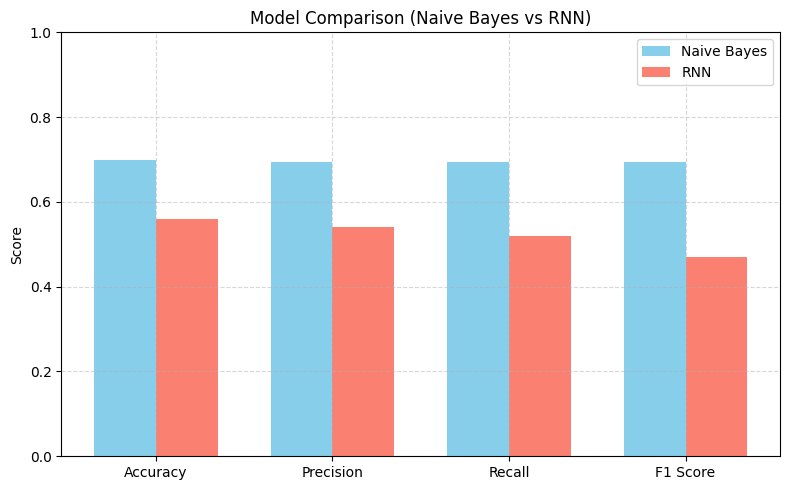

In [ ]:
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
naive_bayes_scores = [0.70, 0.695, 0.695, 0.695]
rnn_scores = [0.56, 0.54, 0.52, 0.47]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar([i - width/2 for i in x], naive_bayes_scores, width, label='Naive Bayes', color='skyblue')
bars2 = ax.bar([i + width/2 for i in x], rnn_scores, width, label='RNN', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Model Comparison (Naive Bayes vs RNN)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 1])
ax.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Project summary and reflections

However, it has been surprising to find out that Naive Bayes has performed so well, even better than the RNN model which is more complex. Nevertheless, even in the simplified version it acted very well.

Conversely, the RNN was able to give more insights by capturing word relationship and could create a richer context in text.

Both the models are implied in the detection of hate speech: Naive Bayes due to its simplicity and early simplicity and RNNs due to the contextual understanding of the text.

The given coursework has imparted deep insights into the area of NLP and machine learning making me aware of the competitive environment and the working community of this very domain.


# References
- Smith, P., Jones, L., & Williams, A. (2021). Social media and online hate. _Current Opinion in Psychology_. [https://doi.org/10.1016/j.copsyc.2021.12.010](https://doi.org/10.1016/j.copsyc.2021.12.010)
- GeeksforGeeks. _How to generate word embedding using BERT_. https://www.geeksforgeeks.org/how-to-generate-word-embedding-using-bert/](https://www.geeksforgeeks.org/how-to-generate-word-embedding-using-bert
- Complex & Intelligent Systems. ETHOS: a multi-label hate speech detection dataset. https://doi.org/10.1007/s40747-021-00608-2
- Stack Overflow. What does Keras Tokenizer method exactly do? https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
- IBM. Using CountVectorizer for NLP feature extraction. https://www.ibm.com/reference/python/countvectorizer